1. What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.
   - K-Means Clustering
   - A partition-based clustering algorithm.
   - Requires the number of clusters (K) to be specified beforehand.
   - Works by minimizing intra-cluster variance.
   - Efficient for large datasets but sensitive to outliers and initial centroids.

   - Use case:
   - Customer segmentation in e-commerce where the number of customer groups is already known.

   - Hierarchical Clustering
   - A tree-based clustering approach that builds a hierarchy (dendrogram).
   - Does not require K in advance.
   - Can be agglomerative (bottom-up) or divisive (top-down).
   - Computationally expensive for large datasets.

   - Use case:
   - Biological taxonomy or document clustering where relationships between clusters matter.

2. Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
   - The Silhouette Score measures how well data points are clustered by comparing:
   - Cohesion (how close a point is to its own cluster)
   - Separation (how far it is from other clusters)

   - Score range:
   - +1 → well clustered
   - 0 → overlapping clusters
   - -1 → wrong clustering

    - It helps compare clustering algorithms and choose optimal parameters.

3. What are the core parameters of DBSCAN, and how do they influence the clustering process?
   - eps (ε)
   - Maximum distance between two points to be considered neighbors.
   - Larger ε → fewer, bigger clusters.

   - min_samples
   - Minimum number of points required to form a dense region.
   - Higher value → stricter clustering.

   - Impact:
   - Together, they control cluster density and noise detection.

4. Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
   - Clustering algorithms use distance metrics (e.g., Euclidean distance).
   - If features are on different scales:
   - Larger-scale features dominate distance calculation
   - Clustering becomes biased

   - Scaling ensures:
   - Fair contribution of all features
   - Better cluster quality

   - Common techniques: StandardScaler, MinMaxScaler

5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
   - The Elbow Method helps determine the optimal number of clusters by:
   - Running K-Means for different K values
   - Plotting Within-Cluster Sum of Squares (WCSS) vs K
   - Identifying the “elbow point” where improvement slows

   - This point represents a good trade-off between complexity and accuracy.

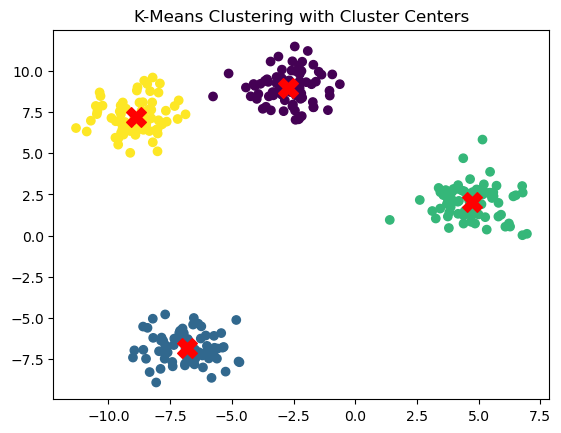

In [7]:
# 6. Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers. 

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200)
plt.title("K-Means Clustering with Cluster Centers")
plt.show()

In [8]:
# 7. Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

dbscan = DBSCAN(eps=1.6, min_samples=5)
labels = dbscan.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

Number of clusters: 3


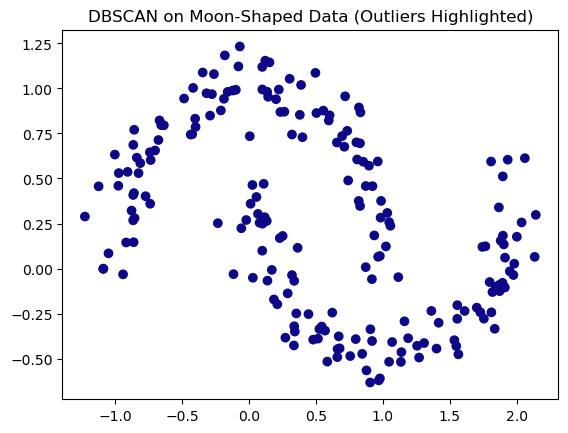

In [9]:
# 8. Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot. 

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN on Moon-Shaped Data (Outliers Highlighted)")
plt.show()

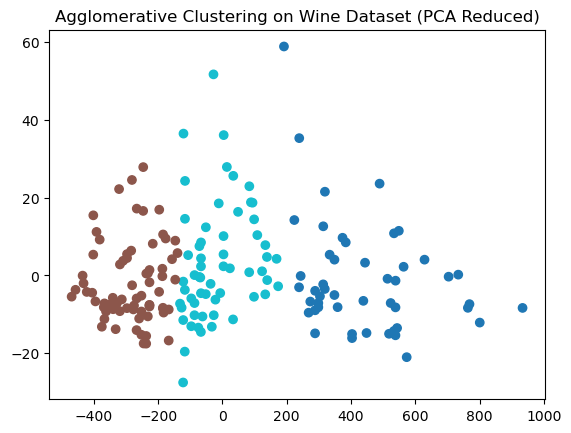

In [10]:
# 9. Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

wine = load_wine()
X_pca = PCA(n_components=2).fit_transform(wine.data)

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10')
plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced)")
plt.show()

10. You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.

Describe your real-world data science workflow using clustering: 
● Which clustering algorithm(s) would you use and why? 
● How would you preprocess the data (missing values, scaling)? 
● How would you determine the number of clusters? 
● How would the marketing team benefit from your clustering analysis?

- Algorithm Choice
- K-Means for large datasets with clear segmentation
- DBSCAN to identify outliers (high-value or unusual customers)
- Hierarchical clustering for exploratory analysis

- Preprocessing
- Handle missing values (mean/median imputation)
- Encode categorical variables (One-Hot Encoding)
- Scale numerical features using StandardScaler

- Determining Clusters
- Elbow Method
- Silhouette Score
- Business interpretability

- Business Benefits
- Personalized promotions
- Improved customer retention
- Targeted marketing campaigns
- Identification of premium and churn-risk customers